# Assignment 4
# DataFrames

In [99]:
# 1. Input the following data into a data frame called titanic, and display the entire data frame
import numpy as np
import pandas as pd


titanic = {'Sex':['Children','Children','Children','Men','Men','Men','Men','Women','Women','Women','Women'], 
                'Class' : ['First','Second','Third','First','Second','Third','Crew','First','Second','Third','Crew'], 
                'Survived': [6,24,27,57,14,75,192,140,80,76,20], 
                'Died':[0,0,52,118,154,387,793,4,13,89,3]}

df = pd.DataFrame(titanic,columns=["Sex","Class","Survived","Died"])
print(df)


         Sex   Class  Survived  Died
0   Children  First   6         0   
1   Children  Second  24        0   
2   Children  Third   27        52  
3   Men       First   57        118 
4   Men       Second  14        154 
5   Men       Third   75        387 
6   Men       Crew    192       793 
7   Women     First   140       4   
8   Women     Second  80        13  
9   Women     Third   76        89  
10  Women     Crew    20        3   


In [100]:
#2. Now only show the data of the people in first class.
print (df.loc[df['Class'] == 'First'])


        Sex  Class  Survived  Died
0  Children  First  6         0   
3  Men       First  57        118 
7  Women     First  140       4   


In [101]:
#3. Delete the crew members from the data.
indexNames = df[ df['Class'] == 'Crew' ].index
 
# Delete these row indexes from dataFrame
df.drop(indexNames , inplace=True)
print(df)

        Sex   Class  Survived  Died
0  Children  First   6         0   
1  Children  Second  24        0   
2  Children  Third   27        52  
3  Men       First   57        118 
4  Men       Second  14        154 
5  Men       Third   75        387 
7  Women     First   140       4   
8  Women     Second  80        13  
9  Women     Third   76        89  


In [102]:
#4. Create a new column that is the total number of people for that group (those who survived + died)
df['Total'] = (df['Survived'] + df['Died'])
print(df)

        Sex   Class  Survived  Died  Total
0  Children  First   6         0     6    
1  Children  Second  24        0     24   
2  Children  Third   27        52    79   
3  Men       First   57        118   175  
4  Men       Second  14        154   168  
5  Men       Third   75        387   462  
7  Women     First   140       4     144  
8  Women     Second  80        13    93   
9  Women     Third   76        89    165  


In [103]:
#5. Create a new column with the percentage of people who survived.
#print(x.Total)
df['Survival Percentage'] = (df['Survived'])/(df['Survived']+df['Died'])
print(df)

        Sex   Class  Survived  Died  Total  Survival Percentage
0  Children  First   6         0     6      1.000000           
1  Children  Second  24        0     24     1.000000           
2  Children  Third   27        52    79     0.341772           
3  Men       First   57        118   175    0.325714           
4  Men       Second  14        154   168    0.083333           
5  Men       Third   75        387   462    0.162338           
7  Women     First   140       4     144    0.972222           
8  Women     Second  80        13    93     0.860215           
9  Women     Third   76        89    165    0.460606           


In [104]:
#6. Delete the column indicating the total number of people in that group.
df.drop(columns=['Total'],inplace=True)
print(df)

        Sex   Class  Survived  Died  Survival Percentage
0  Children  First   6         0     1.000000           
1  Children  Second  24        0     1.000000           
2  Children  Third   27        52    0.341772           
3  Men       First   57        118   0.325714           
4  Men       Second  14        154   0.083333           
5  Men       Third   75        387   0.162338           
7  Women     First   140       4     0.972222           
8  Women     Second  80        13    0.860215           
9  Women     Third   76        89    0.460606           


In [105]:
#7. Only show the rows where more than 80% of the people survived.
new_df = df[df["Survival Percentage"] > 0.80 ]
print(new_df)

        Sex   Class  Survived  Died  Survival Percentage
0  Children  First   6         0     1.000000           
1  Children  Second  24        0     1.000000           
7  Women     First   140       4     0.972222           
8  Women     Second  80        13    0.860215           


In [106]:
#8. Then only show the rows where less than 40% of the people survived.
new_df = df[df["Survival Percentage"] < 0.40 ]
print(new_df)

        Sex   Class  Survived  Died  Survival Percentage
2  Children  Third   27        52    0.341772           
3  Men       First   57        118   0.325714           
4  Men       Second  14        154   0.083333           
5  Men       Third   75        387   0.162338           


In [107]:
grouped = df.groupby('Class')
print(grouped)
x=grouped['Survived'].sum()
y=grouped['Died'].sum()

print(df)



        Sex   Class  Survived  Died  Survival Percentage
0  Children  First   6         0     1.000000           
1  Children  Second  24        0     1.000000           
2  Children  Third   27        52    0.341772           
3  Men       First   57        118   0.325714           
4  Men       Second  14        154   0.083333           
5  Men       Third   75        387   0.162338           
7  Women     First   140       4     0.972222           
8  Women     Second  80        13    0.860215           
9  Women     Third   76        89    0.460606           


In [108]:
#9. Calculate the total number of people that survived and died for each class, then report the percentages. (Hint: Use a grouped calculation.)
df1 = df.groupby('Class')['Survived'].sum().to_frame().reset_index()

df2 = df.groupby('Class')['Died'].sum().to_frame().reset_index()


print(df1)
print(df2)

    Class  Survived
0  First   203     
1  Second  118     
2  Third   178     
    Class  Died
0  First   122 
1  Second  167 
2  Third   528 


In [109]:
df1['Survival percentage'] = df1['Survived']/(df1['Survived']+df2['Died'])
print(df1)

df2['Died percentage'] = df2['Died']/(df1['Survived']+df2['Died'])
print(df2)

    Class  Survived  Survival percentage
0  First   203       0.624615           
1  Second  118       0.414035           
2  Third   178       0.252125           
    Class  Died  Died percentage
0  First   122   0.375385       
1  Second  167   0.585965       
2  Third   528   0.747875       


In [112]:
#Save your table in CSV format (as e.g. titanic_data.csv) with the first line as headers for the columns.
df.to_csv('titanic_data.csv',encoding='utf-8', index=False)
df1.to_csv('titanic_data2.csv',encoding='utf-8', index=False)
df2.to_csv('titanic_data3.csv',encoding='utf-8', index=False)

In [114]:
#12. Now read that updated CSV file into a new data frame called titanic2, and display the data.
Titanic2 = pd.read_csv('titanic_data_dup.csv' )
print(Titanic2)

         Sex   Class  Survived   Died  Survival Percentage
0   Children  First   6.0       0.0    1.000000           
1   Children  Second  24.0      0.0    1.000000           
2   Children  Third   27.0      52.0   0.341772           
3   Men       First   57.0      118.0  0.325714           
4   Men       Second  14.0      154.0  0.083333           
5   Men       Third   75.0      387.0  0.162338           
6   Women     First   140.0     4.0    0.972222           
7   Women     Second  80.0      13.0   0.860215           
8   Women     Third   76.0      89.0   0.460606           
9   Men       crew   NaN       NaN     0.216900           
10  Women     crew   NaN       NaN     0.869600           


In [ ]:
#part 2

In [74]:
#2. Read the text file in as a dataframe
df10 = pd.read_csv("heart.csv", header=None, delimiter=r"\s+")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

df10.columns = ['age','sex','chest_pain','bp','chol','sugar','ecg','heart_rate','angina','oldpeak','slope','vessel','thal','disease']
print(df10)

      age  sex  chest_pain     bp   chol  sugar  ecg  heart_rate  angina  \
0    70.0  1.0  4.0         130.0  322.0  0.0    2.0  109.0       0.0      
1    67.0  0.0  3.0         115.0  564.0  0.0    2.0  160.0       0.0      
2    57.0  1.0  2.0         124.0  261.0  0.0    0.0  141.0       0.0      
3    64.0  1.0  4.0         128.0  263.0  0.0    0.0  105.0       1.0      
4    74.0  0.0  2.0         120.0  269.0  0.0    2.0  121.0       1.0      
5    65.0  1.0  4.0         120.0  177.0  0.0    0.0  140.0       0.0      
6    56.0  1.0  3.0         130.0  256.0  1.0    2.0  142.0       1.0      
7    59.0  1.0  4.0         110.0  239.0  0.0    2.0  142.0       1.0      
8    60.0  1.0  4.0         140.0  293.0  0.0    2.0  170.0       0.0      
9    63.0  0.0  4.0         150.0  407.0  0.0    2.0  154.0       0.0      
10   59.0  1.0  4.0         135.0  234.0  0.0    0.0  161.0       0.0      
11   53.0  1.0  4.0         142.0  226.0  0.0    2.0  111.0       1.0      
12   44.0  1

In [78]:
#3. calculating mean and standard deviation
print("Mean is",df10['age'].mean())
print("Standard deviation is",df10['age'].std())

Mean is 54.43333333333333
Standard deviation is 9.109066523898203


[70.0, 67.0, 57.0, 64.0, 74.0, 65.0, 56.0, 59.0, 60.0, 63.0, 59.0, 53.0, 44.0, 61.0, 57.0, 71.0, 46.0, 53.0, 64.0, 40.0, 67.0, 48.0, 43.0, 47.0, 54.0, 48.0, 46.0, 51.0, 58.0, 71.0, 57.0, 66.0, 37.0, 59.0, 50.0, 48.0, 61.0, 59.0, 42.0, 48.0, 40.0, 62.0, 44.0, 46.0, 59.0, 58.0, 49.0, 44.0, 66.0, 65.0, 42.0, 52.0, 65.0, 63.0, 45.0, 41.0, 61.0, 60.0, 59.0, 62.0, 57.0, 51.0, 44.0, 60.0, 63.0, 57.0, 51.0, 58.0, 44.0, 47.0, 61.0, 57.0, 70.0, 76.0, 67.0, 45.0, 45.0, 39.0, 42.0, 56.0, 58.0, 35.0, 58.0, 41.0, 57.0, 42.0, 62.0, 59.0, 41.0, 50.0, 59.0, 61.0, 54.0, 54.0, 52.0, 47.0, 66.0, 58.0, 64.0, 50.0, 44.0, 67.0, 49.0, 57.0, 63.0, 48.0, 51.0, 60.0, 59.0, 45.0, 55.0, 41.0, 60.0, 54.0, 42.0, 49.0, 46.0, 56.0, 66.0, 56.0, 49.0, 54.0, 57.0, 65.0, 54.0, 54.0, 62.0, 52.0, 52.0, 60.0, 63.0, 66.0, 42.0, 64.0, 54.0, 46.0, 67.0, 56.0, 34.0, 57.0, 64.0, 59.0, 50.0, 51.0, 54.0, 53.0, 52.0, 40.0, 58.0, 41.0, 41.0, 50.0, 54.0, 64.0, 51.0, 46.0, 55.0, 45.0, 56.0, 66.0, 38.0, 62.0, 55.0, 58.0, 43.0, 64.0, 50.

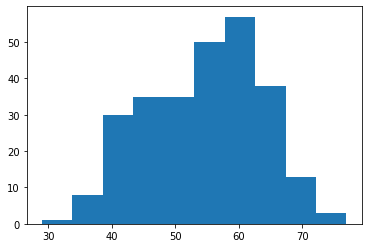

In [83]:
age_list = df10['age'].tolist()
print(age_list)
import matplotlib.pyplot as plt

plt.hist(age_list, bins = 10)
plt.show()

In [84]:
#4. Create a data frame called young_df with all the people below 55 years old. Similarly, create a data frame called old_df with everyone at or above 55 years old.
df_young = df10[df10['age']<55]
df_old = df10[df10['age']>55]
print (df_young)
print (df_old)



      age  sex  chest_pain     bp   chol  sugar  ecg  heart_rate  angina  \
11   53.0  1.0  4.0         142.0  226.0  0.0    2.0  111.0       1.0      
12   44.0  1.0  3.0         140.0  235.0  0.0    2.0  180.0       0.0      
16   46.0  1.0  4.0         140.0  311.0  0.0    0.0  120.0       1.0      
17   53.0  1.0  4.0         140.0  203.0  1.0    2.0  155.0       1.0      
19   40.0  1.0  1.0         140.0  199.0  0.0    0.0  178.0       1.0      
21   48.0  1.0  2.0         130.0  245.0  0.0    2.0  180.0       0.0      
22   43.0  1.0  4.0         115.0  303.0  0.0    0.0  181.0       0.0      
23   47.0  1.0  4.0         112.0  204.0  0.0    0.0  143.0       0.0      
24   54.0  0.0  2.0         132.0  288.0  1.0    2.0  159.0       1.0      
25   48.0  0.0  3.0         130.0  275.0  0.0    0.0  139.0       0.0      
26   46.0  0.0  4.0         138.0  243.0  0.0    2.0  152.0       1.0      
27   51.0  0.0  3.0         120.0  295.0  0.0    2.0  157.0       0.0      
32   37.0  0

In [97]:
# 5. Find the mean age, blood pressure, cholesterol, and max heart rate for people with heart disease, and separately for the people without heart disease
print('Mean Age ',df10.groupby('disease')['age'].mean())
print('Mean Blood pressure',df10.groupby('disease')['bp'].mean())
print('Mean Cholesterol',df10.groupby('disease')['chol'].mean())
print('Maximum Heart rate',df10.groupby('disease')['heart_rate'].max())


Mean Age  disease
1    52.706667
2    56.591667
Name: age, dtype: float64
Mean Blood pressure disease
1    128.866667
2    134.441667
Name: bp, dtype: float64
Mean Cholesterol disease
1    244.213333
2    256.466667
Name: chol, dtype: float64
Maximum Heart rate disease
1    202.0
2    195.0
Name: heart_rate, dtype: float64
